In [1]:
import pandas as pd
import numpy as np
import matplotlib as matplot
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import seaborn as sns

In [2]:
earthquake_tb = pd.read_csv("earthquakes_2023_global.csv")
earthquake_tb.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.87000,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.139700,126.738000,79.194,4.50,mb,32.0,104.0,1.15200,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.163100,-66.525100,24.000,3.93,md,23.0,246.0,0.84790,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.780300,102.767500,63.787,4.30,mb,17.0,187.0,0.45700,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.40000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us
5,2023-01-01T04:50:17.639Z,19.281100,-155.428200,37.751,2.80,ml,19.0,127.0,0.06600,0.18,...,2023-03-11T22:51:29.040Z,"10 km NNE of P?hala, Hawaii",earthquake,2.77,5.266,0.060,36.0,reviewed,us,us
6,2023-01-01T04:54:53.914Z,-19.041900,-177.542300,556.990,4.10,mb,15.0,87.0,3.05100,0.15,...,2023-03-11T22:51:45.040Z,Fiji region,earthquake,12.85,13.028,0.213,6.0,reviewed,us,us
7,2023-01-01T05:02:46.402Z,-15.321900,-174.875600,255.470,4.10,mb,40.0,81.0,3.41300,0.32,...,2023-03-11T22:51:45.040Z,Tonga,earthquake,9.84,6.047,0.095,34.0,reviewed,us,us
8,2023-01-01T05:18:17.780Z,40.703833,-124.206167,18.470,2.70,md,30.0,154.0,0.01251,0.14,...,2023-04-05T16:43:13.238Z,"3km SSW of Humboldt Hill, CA",earthquake,0.41,0.280,0.112,35.0,reviewed,nc,nc
9,2023-01-01T05:37:05.794Z,2.475200,128.638900,231.588,4.10,mb,27.0,119.0,2.11700,0.45,...,2023-03-11T22:51:45.040Z,"108 km NE of Tobelo, Indonesia",earthquake,7.94,9.269,0.123,18.0,reviewed,us,us


### Data Pre-processing

In [3]:
earthquake_tb.shape

(26642, 22)

In [4]:
# Check the data types of each column.
earthquake_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [5]:
earthquake_tb['time'] = pd.to_datetime(earthquake_tb['time'])
# earthquake_tb['nst'] = earthquake_tb['nst'].astype('Int64')
earthquake_tb['updated'] = pd.to_datetime(earthquake_tb['updated'])
# earthquake_tb['magNst'] = earthquake_tb['magNst'].astype('Int64')

# Verify the changes
print(earthquake_tb.dtypes)


time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated            datetime64[ns, UTC]
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
dtype: object


In [6]:
earthquake_tb.describe(include = "all")

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_19352/177951994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  earthquake_tb.describe(include = "all")
/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_19352/177951994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  earthquake_tb.describe(include = "all")


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
count,26642,26642.000000,26642.000000,26642.000000,26642.000000,26642,25227.000000,25225.000000,24776.000000,26642.000000,...,26642,25034,26642,25093.000000,26642.000000,24970.000000,25065.000000,26642,26642,26642
unique,24682,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,...,7847,14811,8,NaN,NaN,NaN,NaN,2,16,19
top,2023-04-06 01:08:20.773000+00:00,NaN,NaN,NaN,NaN,mb,NaN,NaN,NaN,NaN,...,2023-10-17 22:01:29.040000+00:00,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
freq,2,NaN,NaN,NaN,NaN,15906,NaN,NaN,NaN,NaN,...,97,358,26428,NaN,NaN,NaN,NaN,26566,21409,21249
first,2023-01-01 00:49:25.294000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-01-01 09:28:26.140000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-29 23:17:18.800000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-12-30 00:31:47.395000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.852798,-11.487497,67.491224,4.007395,NaN,42.571332,124.930971,2.692908,0.581575,...,NaN,NaN,NaN,7.017267,4.475056,0.122735,33.315939,NaN,NaN,NaN
std,NaN,30.389200,130.053399,116.762456,0.794423,NaN,37.662352,67.430145,4.043568,0.256276,...,NaN,NaN,NaN,4.072365,4.451649,0.102271,48.022567,NaN,NaN,NaN
min,NaN,-65.849700,-179.998700,-3.370000,2.600000,NaN,0.000000,8.000000,0.000000,0.010000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,-6.415275,-149.608650,10.000000,3.220000,NaN,19.000000,73.000000,0.612000,0.410000,...,NaN,NaN,NaN,4.140000,1.848000,0.080000,10.000000,NaN,NaN,NaN


In [7]:
earthquake_tb.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
dtype: int64

In [8]:
# Use random value to fill nst
# earthquake_tb['nst'].fillna(np.random.randint(0, 423), inplace=True)
# fill random numbers in gap column
# earthquake_tb['gap'].fillna(np.random.randint(8, 350), inplace=True)
# earthquake_tb['dmin'].fillna(np.random.uniform(0, 50.82), inplace=True)
# earthquake_tb['place'].fillna('UNKNOWN', inplace=True)
# earthquake_tb['horizontalError'].fillna(np.random.uniform(0, 99), inplace=True)
# earthquake_tb['depthError'].fillna(np.random.uniform(0, 60.67), inplace=True)
# earthquake_tb['magError'].fillna(np.random.uniform(0, 4.49), inplace=True)
# earthquake_tb['magNst'].fillna(np.random.randint(0, 884), inplace=True)

earthquake_tb['nst'].fillna(earthquake_tb['nst'].mean(), inplace=True)
earthquake_tb['gap'].fillna(earthquake_tb['gap'].mean(), inplace=True)
earthquake_tb['dmin'].fillna(earthquake_tb['dmin'].mean(), inplace=True)
earthquake_tb['horizontalError'].fillna(earthquake_tb['horizontalError'].mean(), inplace=True)
earthquake_tb['magError'].fillna(earthquake_tb['magError'].mean(), inplace=True)
earthquake_tb['magNst'].fillna(earthquake_tb['magNst'].mean(), inplace=True)

In [9]:
# check again
earthquake_tb.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                   0
gap                   0
dmin                  0
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError       0
depthError            0
magError              0
magNst                0
status                0
locationSource        0
magSource             0
dtype: int64

In [10]:
earthquake_tb.describe(include = "all")

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_19352/177951994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  earthquake_tb.describe(include = "all")
/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_19352/177951994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  earthquake_tb.describe(include = "all")


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
count,26642,26642.000000,26642.000000,26642.000000,26642.000000,26642,26642.000000,26642.000000,26642.000000,26642.000000,...,26642,25034,26642,26642.000000,26642.000000,26642.000000,26642.000000,26642,26642,26642
unique,24682,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,...,7847,14811,8,NaN,NaN,NaN,NaN,2,16,19
top,2023-04-06 01:08:20.773000+00:00,NaN,NaN,NaN,NaN,mb,NaN,NaN,NaN,NaN,...,2023-10-17 22:01:29.040000+00:00,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
freq,2,NaN,NaN,NaN,NaN,15906,NaN,NaN,NaN,NaN,...,97,358,26428,NaN,NaN,NaN,NaN,26566,21409,21249
first,2023-01-01 00:49:25.294000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-01-01 09:28:26.140000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-29 23:17:18.800000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-12-30 00:31:47.395000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.852798,-11.487497,67.491224,4.007395,NaN,42.571332,124.930971,2.692908,0.581575,...,NaN,NaN,NaN,7.017267,4.475056,0.122735,33.315939,NaN,NaN,NaN
std,NaN,30.389200,130.053399,116.762456,0.794423,NaN,36.648514,65.612383,3.899387,0.256276,...,NaN,NaN,NaN,3.952201,4.451649,0.099010,46.579551,NaN,NaN,NaN
min,NaN,-65.849700,-179.998700,-3.370000,2.600000,NaN,0.000000,8.000000,0.000000,0.010000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,-6.415275,-149.608650,10.000000,3.220000,NaN,19.000000,75.000000,0.666475,0.410000,...,NaN,NaN,NaN,4.350000,1.848000,0.082000,11.000000,NaN,NaN,NaN


In [11]:
# Check for and remove duplicate rows (if any) and drop.
earthquake_tb_no_duplicates = earthquake_tb.drop_duplicates()

In [12]:
earthquake_tb_no_duplicates.shape # drop 1960 rows

(24682, 22)

### Converting time to date time

In [13]:
earthquake_tb['time'] = pd.to_datetime(earthquake_tb['time'])

In [14]:
earthquake_tb['time']

0       2023-01-01 00:49:25.294000+00:00
1       2023-01-01 01:41:43.755000+00:00
2       2023-01-01 03:29:31.070000+00:00
3       2023-01-01 04:09:32.814000+00:00
4       2023-01-01 04:29:13.793000+00:00
                      ...               
26637   2023-12-29 03:37:19.334000+00:00
26638   2023-12-29 04:38:54.109000+00:00
26639   2023-12-29 08:42:05.747000+00:00
26640   2023-12-29 11:02:48.679000+00:00
26641   2023-12-29 16:31:16.656000+00:00
Name: time, Length: 26642, dtype: datetime64[ns, UTC]

### Label encoding magType

In [15]:
le = LabelEncoder()
earthquake_tb['magType'] = le.fit_transform(earthquake_tb['magType'])

In [16]:
earthquake_tb['magType']

0        4
1        0
2        2
3        0
4        4
        ..
26637    0
26638    0
26639    0
26640    0
26641    0
Name: magType, Length: 26642, dtype: int64

### Detecting outliers & handling them

In [17]:
z_scores = (earthquake_tb.select_dtypes(include='number') - earthquake_tb.select_dtypes(include='number').mean()) / earthquake_tb.select_dtypes(include='number').std()
outliers = (z_scores.abs() > 3).any(axis=1)
earthquake_tb = earthquake_tb[~outliers]

### Normalizing numerical columns

In [18]:
# numeric_columns = earthquake_tb.select_dtypes(include='number').columns
# scaler = StandardScaler()
# earthquake_tb[numeric_columns] = scaler.fit_transform(earthquake_tb[numeric_columns])



column_rest = ['latitude', 'longitude','mag', 'magType']
df_rest = earthquake_tb[column_rest]
df_nor = earthquake_tb.drop(columns = column_rest)
numeric_columns = df_nor.select_dtypes(include='number').columns
scaler = StandardScaler()
earthquake_tb[numeric_columns] = scaler.fit_transform(earthquake_tb[numeric_columns])
earthquake_tb

# Concatenate the normalized columns with the rest of the DataFrame
# df_result = pd.concat([df_rest, df_normalized], axis=1)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,0.520909,4.50,0,-0.164984,-0.417680,-0.461879,-0.384251,...,2023-03-11 22:51:45.040000+00:00,"23 km ESE of Manay, Philippines",earthquake,-0.310457,1.033704,-0.787326,0.523233,reviewed,us,us
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,-0.371570,3.93,2,-0.545915,1.859043,-0.602182,-1.347859,...,2023-03-11 22:51:29.040000+00:00,Puerto Rico region,earthquake,-1.558886,3.563029,-0.659476,-0.437969,reviewed,pr,pr
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,0.271780,4.30,0,-0.799869,0.913080,-0.782533,-0.230074,...,2023-03-11 22:51:45.040000+00:00,"99 km SSW of Pagar Alam, Indonesia",earthquake,0.975967,0.776162,2.043644,-0.829570,reviewed,us,us
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,-0.597948,3.00,4,-0.715218,0.961180,-0.808831,-1.000960,...,2023-03-11 22:51:38.040000+00:00,"59 km SSW of Unalaska, Alaska",earthquake,-1.423187,-0.585897,-0.750798,-0.366769,reviewed,us,us
5,2023-01-01 04:50:17.639000+00:00,19.2811,-155.4282,-0.149218,2.80,4,-0.715218,-0.048915,-0.962930,-1.502037,...,2023-03-11 22:51:29.040000+00:00,"10 km NNE of P?hala, Hawaii",earthquake,-1.054087,0.385685,-1.207406,0.274032,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26636,2023-12-29 02:38:10.338000+00:00,-7.1068,67.9465,-0.597948,5.00,0,0.723856,-0.978844,4.835599,0.656446,...,2023-12-29 04:43:19.040000+00:00,Mid-Indian Ridge,earthquake,1.402061,-0.635561,-1.170877,1.982835,reviewed,us,us
26637,2023-12-29 03:37:19.334000+00:00,-6.9527,154.9829,-0.597948,5.20,0,1.528044,-1.123143,0.817045,1.388788,...,2023-12-29 04:05:57.040000+00:00,"89 km SW of Panguna, Papua New Guinea",earthquake,0.927116,-0.655487,-1.426578,4.012039,reviewed,us,us
26639,2023-12-29 08:42:05.747000+00:00,-7.2411,68.0663,-0.597948,5.10,0,1.020136,-1.219343,4.901114,0.001192,...,2023-12-29 08:57:05.040000+00:00,Chagos Archipelago region,earthquake,0.370751,-0.647457,-0.659476,0.416432,reviewed,us,us
26640,2023-12-29 11:02:48.679000+00:00,-19.1602,169.0428,1.718610,4.70,0,0.173622,-1.107110,0.734921,0.964801,...,2023-12-29 11:22:46.040000+00:00,"49 km NNW of Isangel, Vanuatu",earthquake,0.506449,1.030135,-0.823855,0.630033,reviewed,us,us


### Extracting date time features

In [19]:
earthquake_tb['year'] = earthquake_tb['time'].dt.year
earthquake_tb['month'] = earthquake_tb['time'].dt.month
earthquake_tb['day'] = earthquake_tb['time'].dt.day
earthquake_tb['hour'] = earthquake_tb['time'].dt.hour

### Cleaned dataset

In [20]:
print("\nCleaned and encoded dataset:")
print(earthquake_tb.head())


Cleaned and encoded dataset:
                              time  latitude  longitude     depth   mag  \
1 2023-01-01 01:41:43.755000+00:00    7.1397   126.7380  0.520909  4.50   
2 2023-01-01 03:29:31.070000+00:00   19.1631   -66.5251 -0.371570  3.93   
3 2023-01-01 04:09:32.814000+00:00   -4.7803   102.7675  0.271780  4.30   
4 2023-01-01 04:29:13.793000+00:00   53.3965  -166.9417 -0.597948  3.00   
5 2023-01-01 04:50:17.639000+00:00   19.2811  -155.4282 -0.149218  2.80   

   magType       nst       gap      dmin       rms  ... depthError  magError  \
1        0 -0.164984 -0.417680 -0.461879 -0.384251  ...   1.033704 -0.787326   
2        2 -0.545915  1.859043 -0.602182 -1.347859  ...   3.563029 -0.659476   
3        0 -0.799869  0.913080 -0.782533 -0.230074  ...   0.776162  2.043644   
4        4 -0.715218  0.961180 -0.808831 -1.000960  ...  -0.585897 -0.750798   
5        4 -0.715218 -0.048915 -0.962930 -1.502037  ...   0.385685 -1.207406   

     magNst    status locationSource  

## Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Earthquake Magnitude Distribution

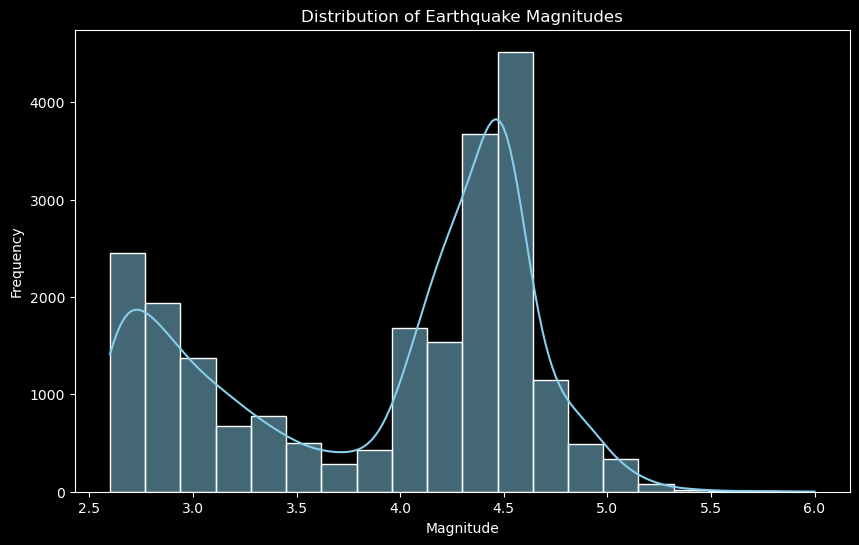

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_tb['mag'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

### 2. Earthquake Status Distribution

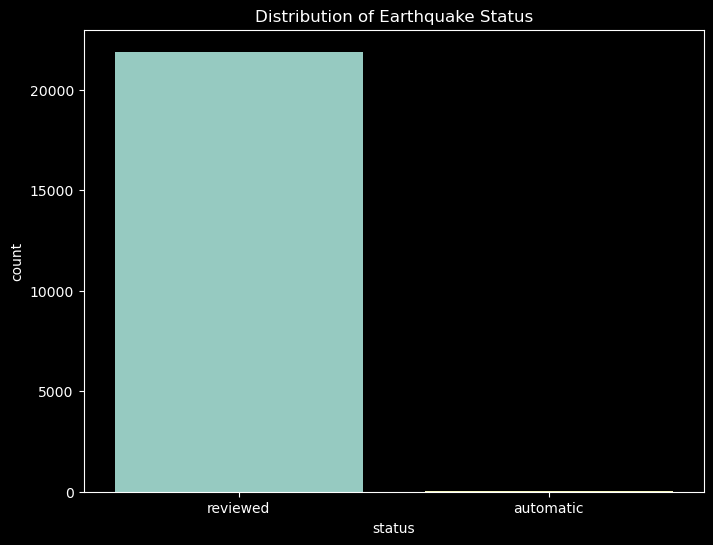

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=earthquake_tb)
plt.title('Distribution of Earthquake Status')
plt.show()

### 3. Scatter plot of earthquake depth vs. magnitude

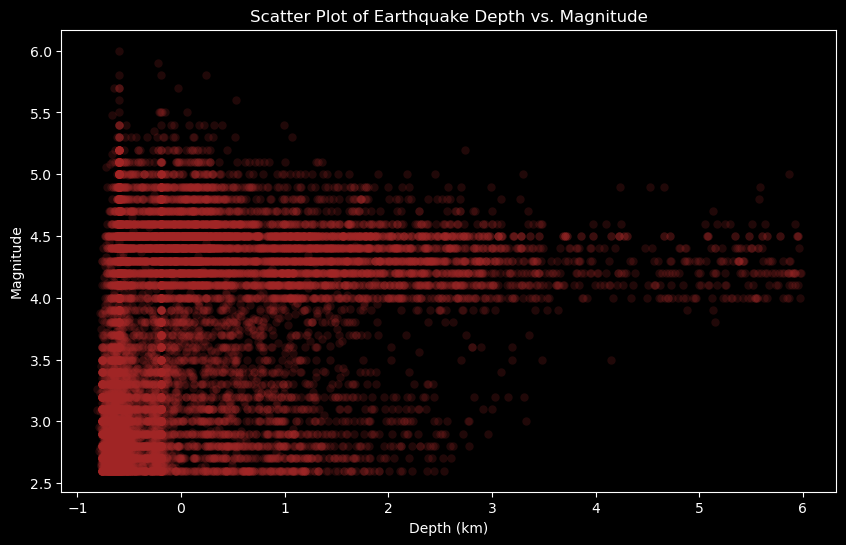

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='mag', data=earthquake_tb, color='brown', linewidth=0, alpha=0.2)
plt.title('Scatter Plot of Earthquake Depth vs. Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

### 4. Box plot of earthquake magnitudes by location source

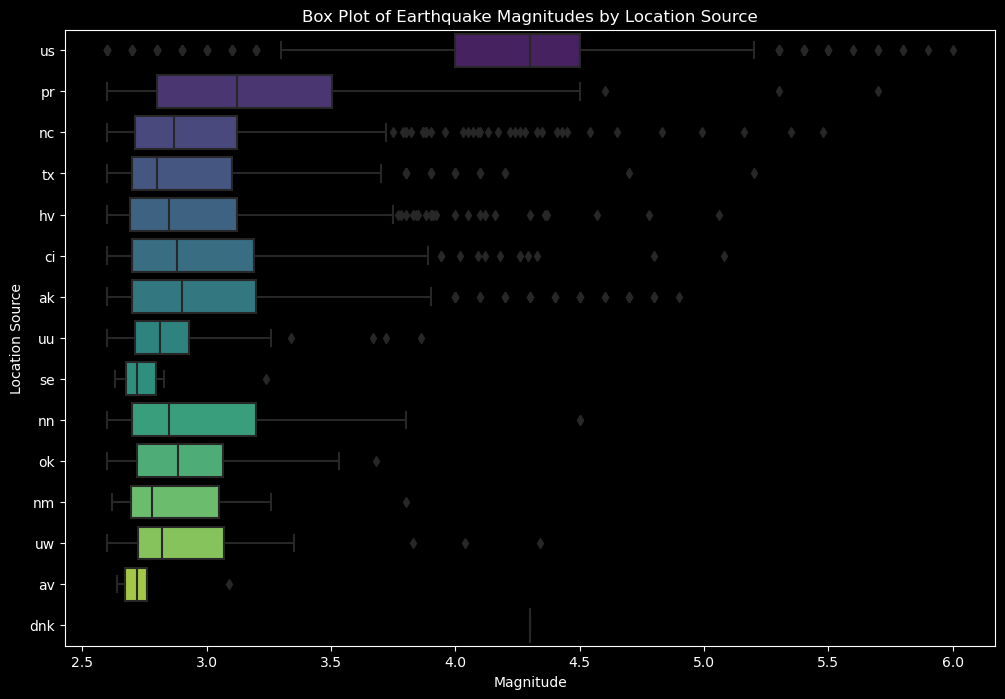

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mag', y='locationSource', data=earthquake_tb, palette='viridis')
plt.title('Box Plot of Earthquake Magnitudes by Location Source')
plt.xlabel('Magnitude')
plt.ylabel('Location Source')
plt.show()

### 5. Violin Plot of Magnitude Distribution by Type

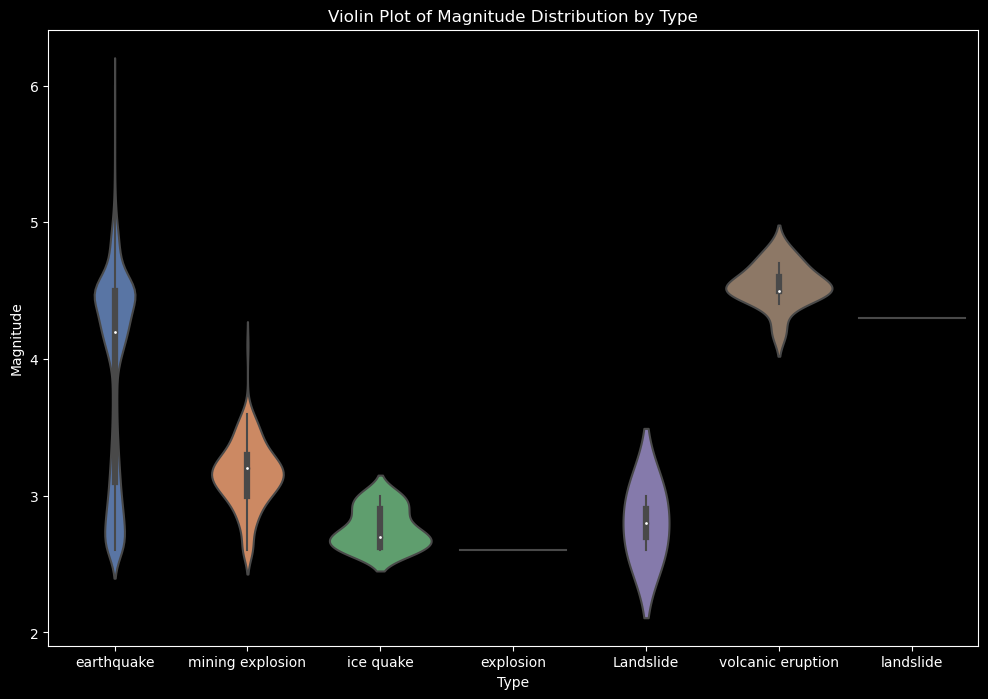

In [26]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='type', y='mag', data=earthquake_tb, palette='deep')
plt.title('Violin Plot of Magnitude Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Magnitude')
plt.show()

### 6. Time series plot of earthquake occurrences over time

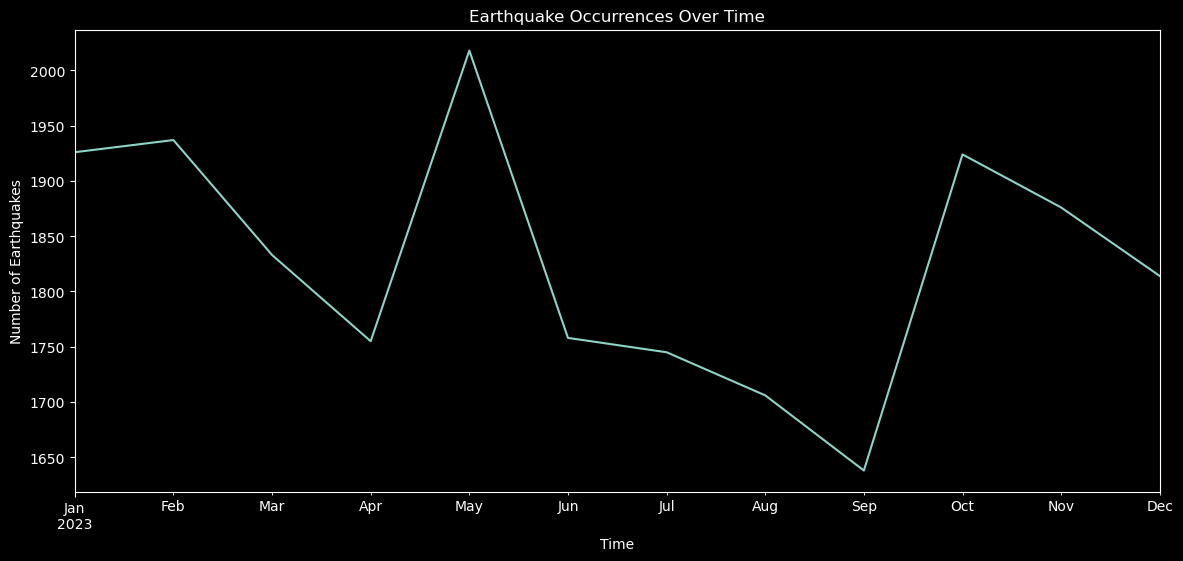

In [27]:
earthquake_tb['time'] = pd.to_datetime(earthquake_tb['time'])
earthquake_tb.set_index('time', inplace=True)

plt.figure(figsize=(14, 6))
earthquake_tb.resample('M').size().plot(legend=False)
plt.title('Earthquake Occurrences Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.show()

### 7. Pairplot

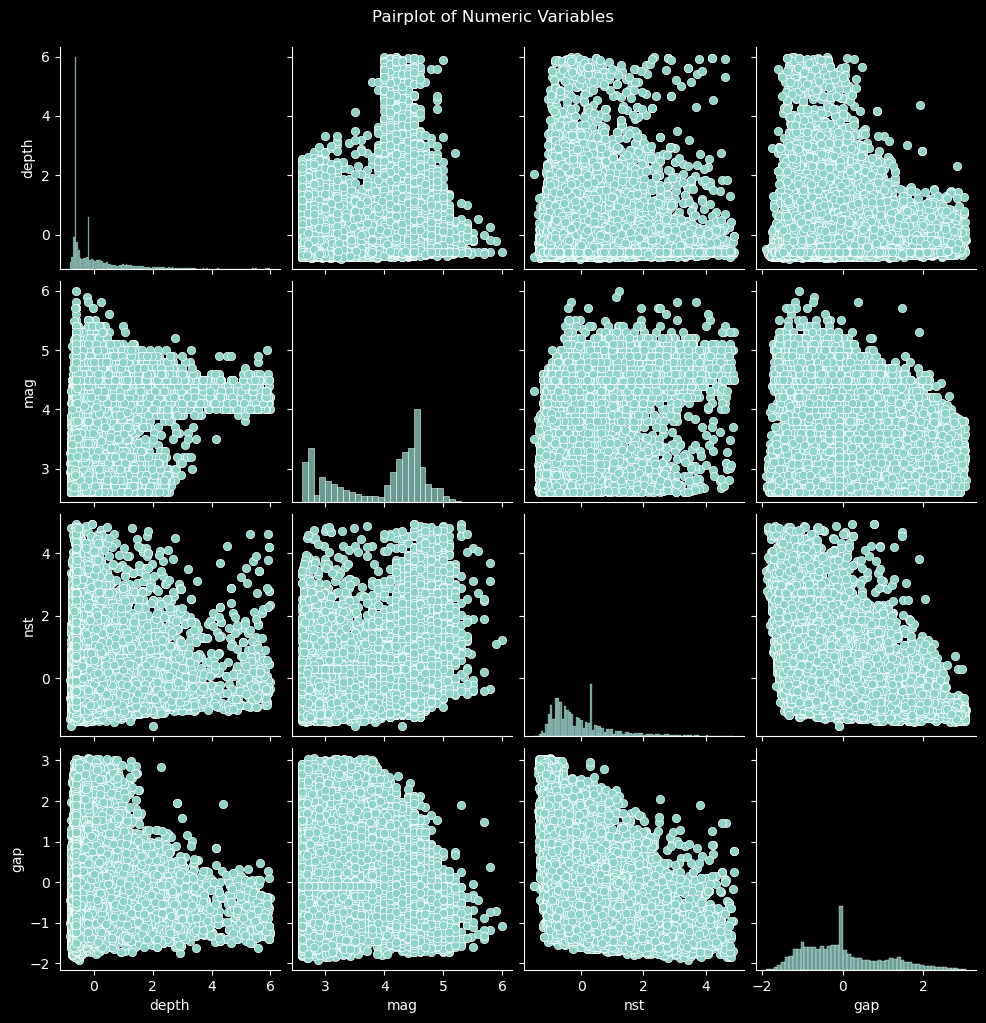

In [28]:
sns.pairplot(earthquake_tb[['depth', 'mag', 'nst', 'gap']])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

### 8. Violin plot to compare earthquake depths by type

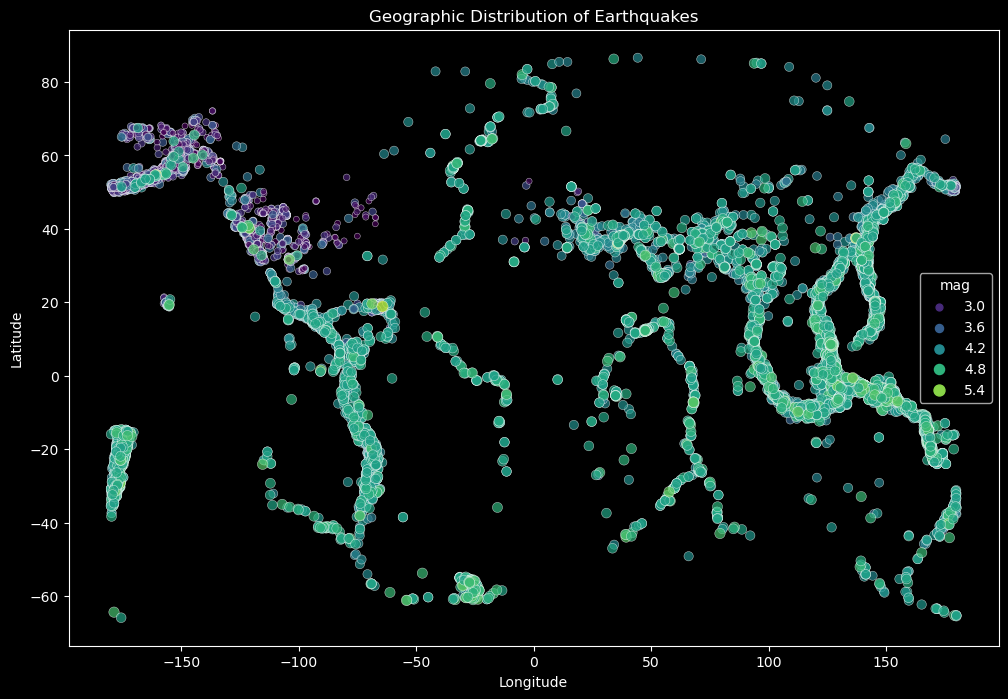

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='mag', size='mag', data=earthquake_tb, palette='viridis', alpha=0.7)
plt.title('Geographic Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [30]:
!apt-get install -y libgeos-dev
!pip install basemap

zsh:1: command not found: apt-get
Defaulting to user installation because normal site-packages is not writeable


In [31]:
from mpl_toolkits.basemap import Basemap

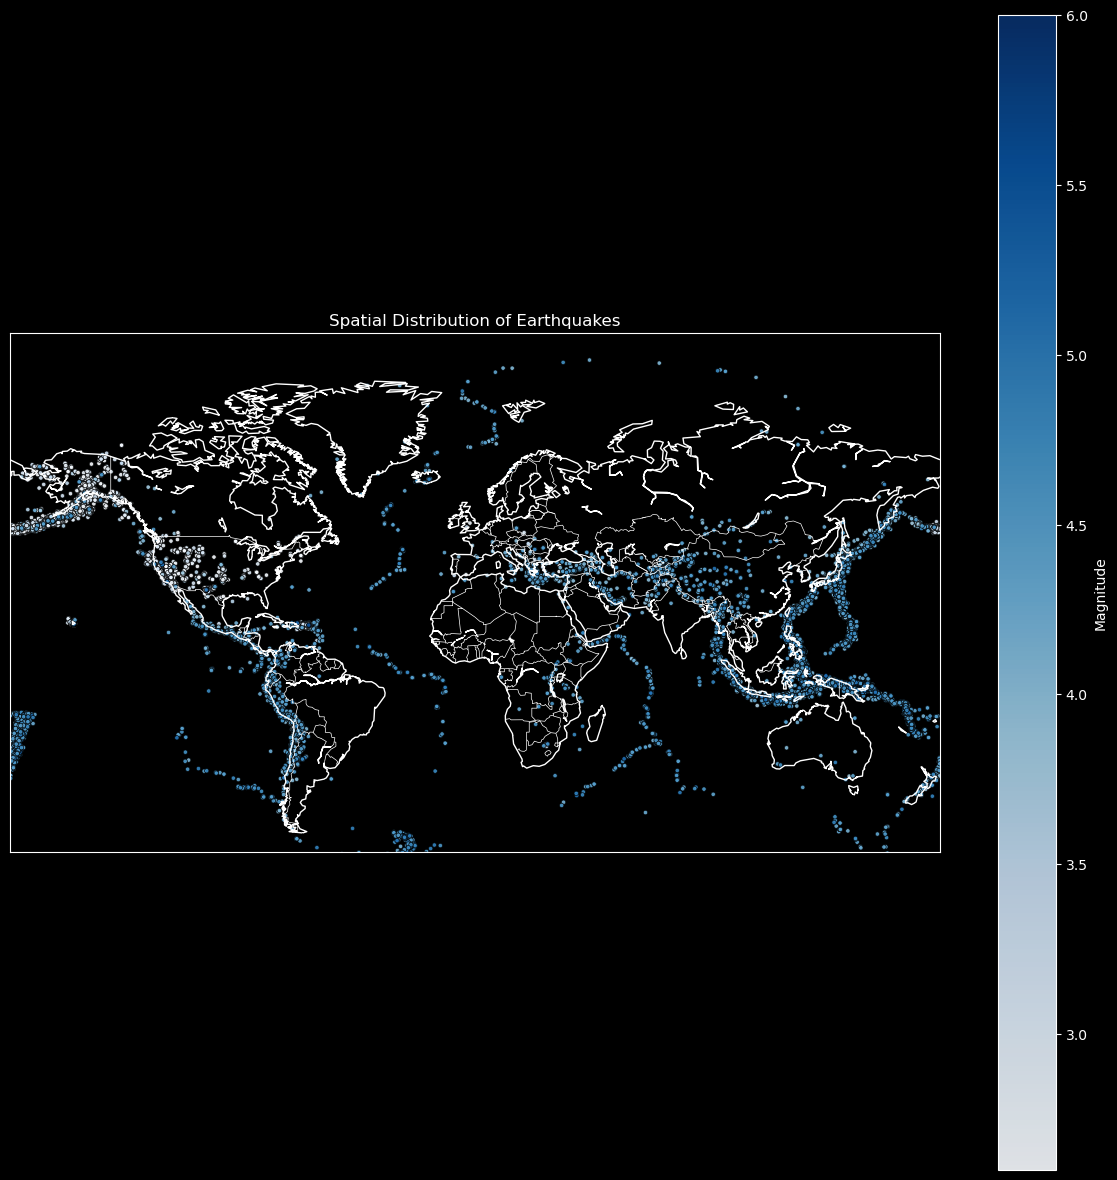

In [32]:
plt.rcParams["figure.figsize"] = 15, 15
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines(color = 'white')
m.drawcountries(color = 'white')
# Scatter plot earthquake locations on the map
x, y = m(earthquake_tb['longitude'].values, earthquake_tb['latitude'].values)
m.scatter(x, y, c=earthquake_tb['mag'].values, s=10, cmap='Blues', alpha=0.9, edgecolors='k', linewidth=0.5)
plt.colorbar(label='Magnitude')
plt.title('Spatial Distribution of Earthquakes')
plt.show()

### 9. Bar plot of the top N locations with the highest earthquake frequencies

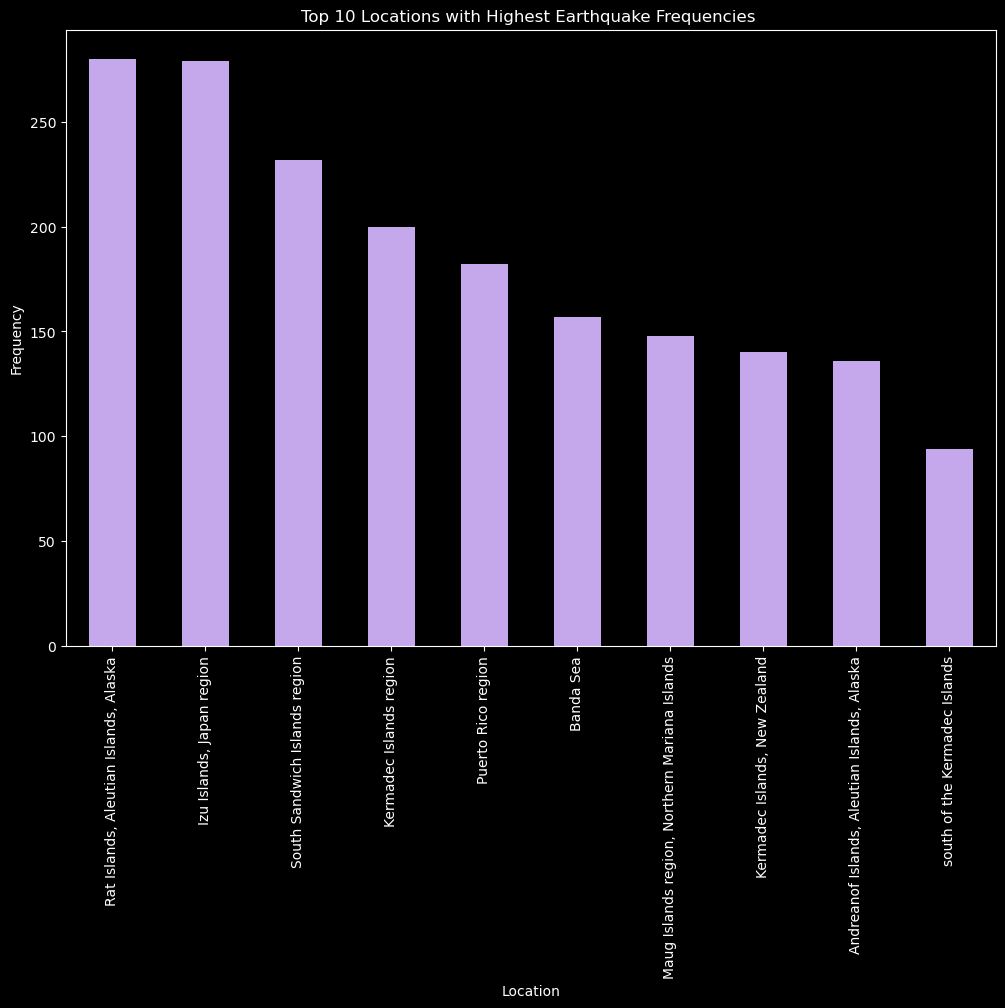

In [33]:
top_locations = earthquake_tb['place'].value_counts().nlargest(11)[1:]
plt.figure(figsize=(12, 8))
top_locations.plot(kind='bar', color='#C5A8EC')
plt.title('Top 10 Locations with Highest Earthquake Frequencies ')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

###  10. Statistical summary of earthquake magnitudes

In [34]:
print("\nStatistical Summary of Earthquake Magnitudes:")
print(earthquake_tb['mag'].describe())


Statistical Summary of Earthquake Magnitudes:
count    21930.000000
mean         3.891112
std          0.750497
min          2.600000
25%          3.100000
50%          4.200000
75%          4.500000
max          6.000000
Name: mag, dtype: float64


### 11. Correlation matrix to analyze relationships between numeric variables

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_19352/3459825255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = earthquake_tb.corr()


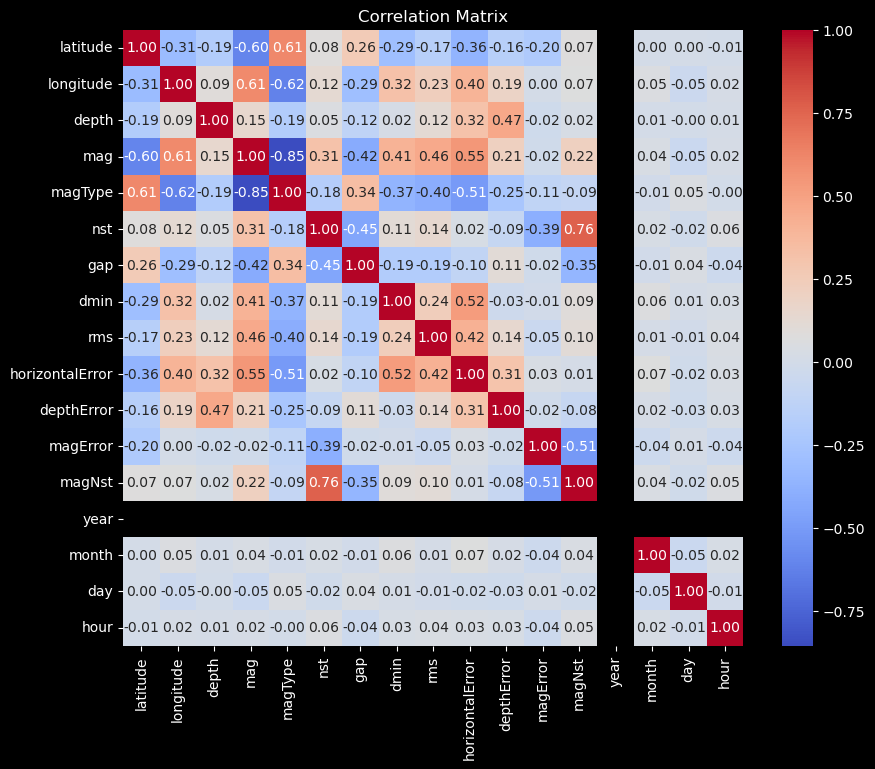

In [35]:
correlation_matrix = earthquake_tb.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [36]:
earthquake_type1 = earthquake_tb[earthquake_tb['type'] == 'earthquake']['depth'].dropna()
earthquake_type2 = earthquake_tb[earthquake_tb['type'] == 'other']['depth'].dropna()

print("Number of data points in earthquake_type1:", len(earthquake_type1))
print("Number of data points in earthquake_type2:", len(earthquake_type2))

Number of data points in earthquake_type1: 21721
Number of data points in earthquake_type2: 0


In [37]:
print("Descriptive statistics for earthquake_type1:\n", earthquake_type1.describe())
#print("\nDescriptive statistics for earthquake_type2:\n", earthquake_type2.describe())

Descriptive statistics for earthquake_type1:
 count    21721.000000
mean         0.007217
std          1.002093
min         -0.814138
25%         -0.597948
50%         -0.456785
75%          0.195895
max          5.984055
Name: depth, dtype: float64


## V. Advanced Analysis

### 1. Predicting Earthquake Magnitude

Mean Squared Error: 0.4564909016864283


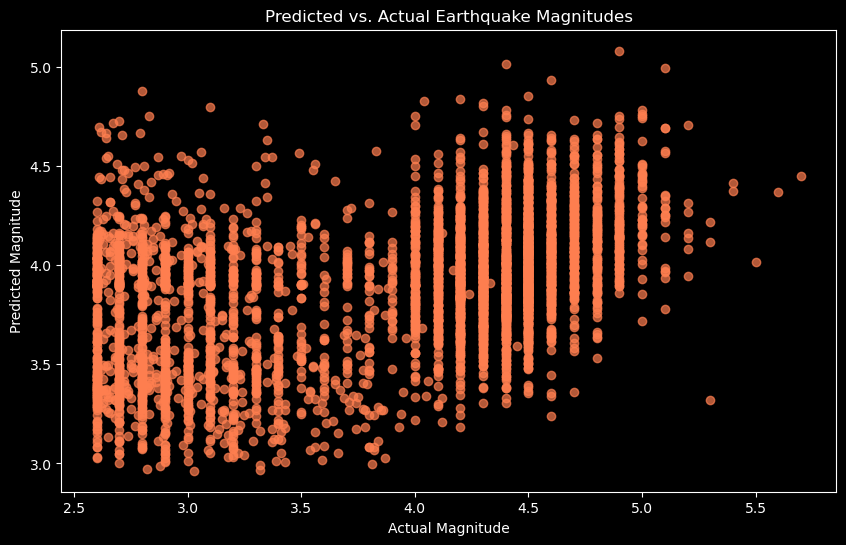

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['depth', 'nst', 'gap']

X_train, X_test, y_train, y_test = train_test_split(earthquake_tb[features], earthquake_tb['mag'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='coral', alpha=0.7)
plt.title('Predicted vs. Actual Earthquake Magnitudes')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.show()

### 2. Clustering Earthquake Locations

/Users/aishwaryabs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


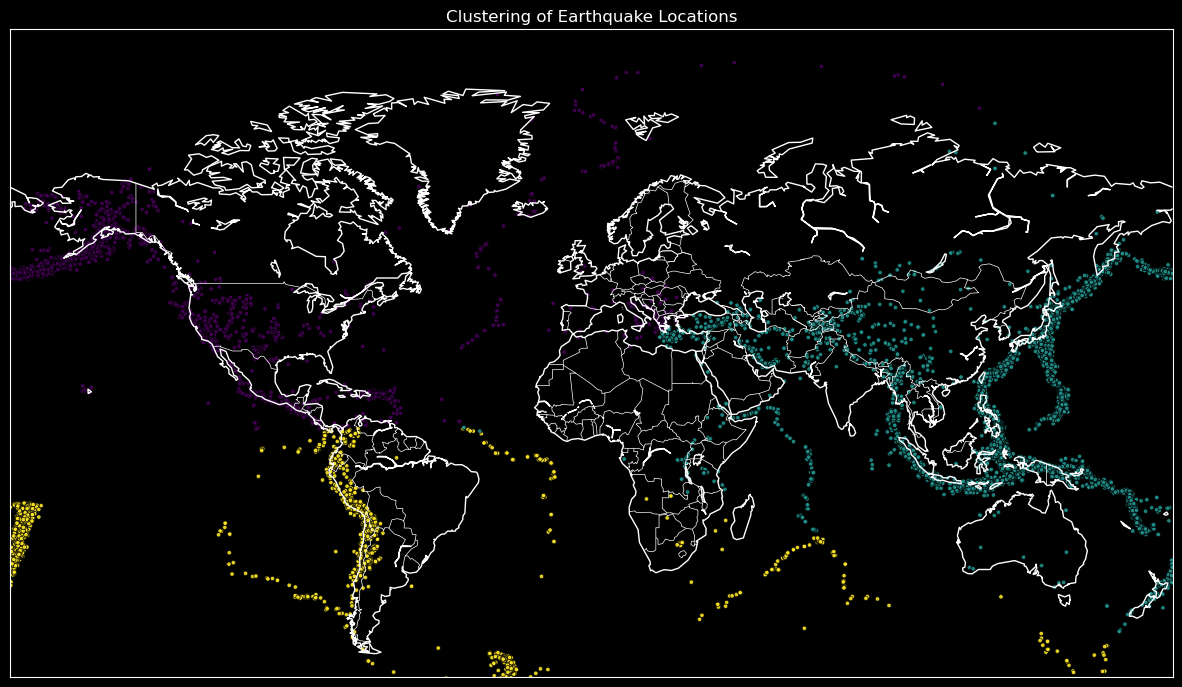

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = ['latitude', 'longitude']

scaler = StandardScaler()
earthquake_locations_scaled = scaler.fit_transform(earthquake_tb[features])

kmeans = KMeans(n_clusters=3, random_state=42)
earthquake_tb['cluster'] = kmeans.fit_predict(earthquake_locations_scaled)

plt.rcParams["figure.figsize"] = 15, 15
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines(color = 'white')
m.drawcountries(color = 'white')
# Scatter plot earthquake locations on the map
x, y = m(earthquake_tb['longitude'].values, earthquake_tb['latitude'].values)
m.scatter(x, y, c=earthquake_tb['cluster'].values, s=10, alpha=0.9, edgecolors='k', linewidth=0.5)
plt.title('Clustering of Earthquake Locations')
plt.show()

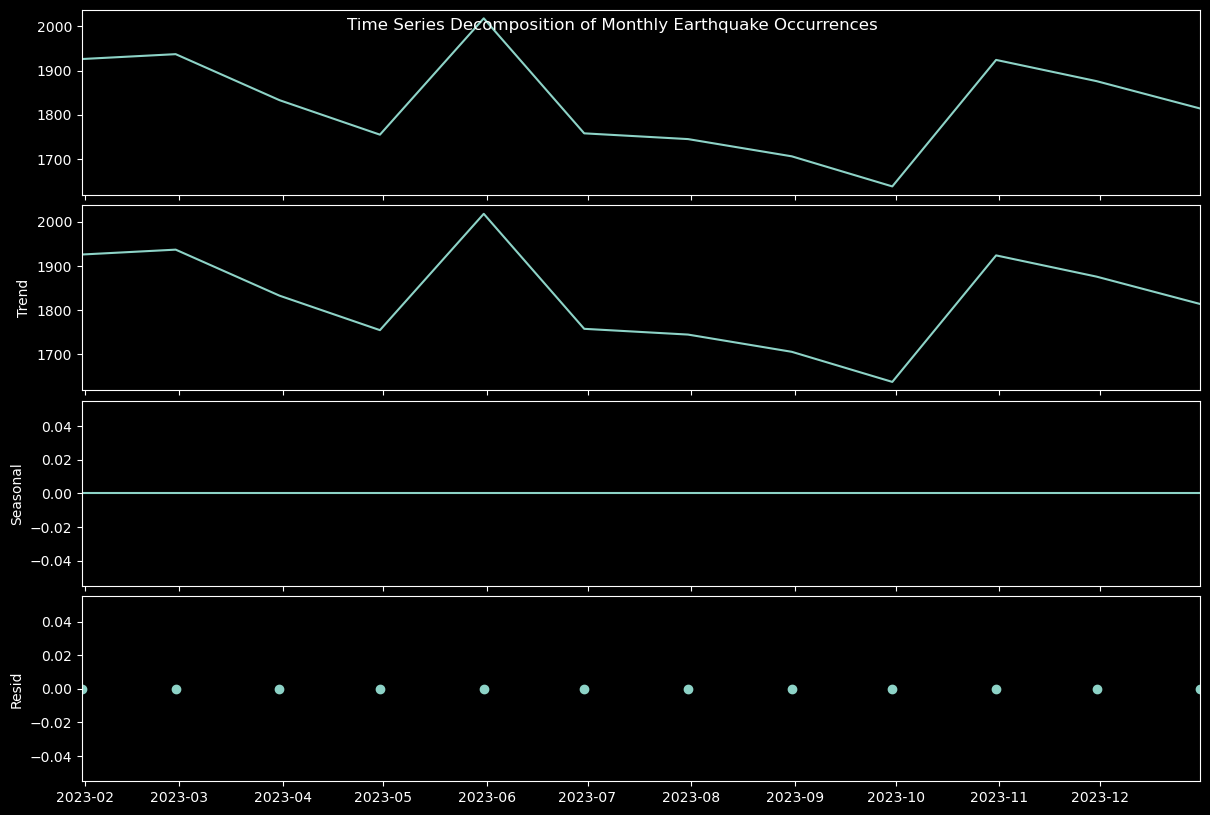

In [40]:
import statsmodels.api as sm

monthly_earthquakes = earthquake_tb.resample('M').size()


result = sm.tsa.seasonal_decompose(monthly_earthquakes, model='additive', period=1)
fig = result.plot()

fig.set_size_inches((12,8))


plt.suptitle('Time Series Decomposition of Monthly Earthquake Occurrences')
plt.show()